## CAT classifier using deep neural network

#### Import the packages need for image-recognition 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

%matplotlib inline

#### Load the dataset

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

AxesImage(54,36;334.8x217.44)
(209, 64, 64, 3)


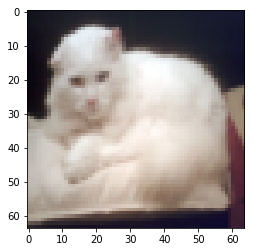

In [3]:
#view the dataset
c = 13
cat = train_set_x_orig[c]
print(plt.imshow(cat))
print(train_set_x_orig.shape)

AxesImage(54,36;334.8x217.44)


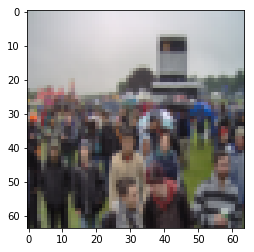

In [4]:
nc = 100
non_cat = train_set_x_orig[nc]
print(plt.imshow(non_cat))

In [5]:
#unroll the data from 64,64, 3 to (64 * 64 * 3), 1
X_train = train_set_x_orig.reshape(209,64 * 64 * 3)
X_test  = test_set_x_orig.reshape(50,64*64*3)

X_train = X_train.T
Y_train = train_set_y
X_test  = X_test.T

#normalize the data
X_train = X_train / (np.max(X_train, axis = 0))


X_test  = X_test / (np.max(X_test, axis = 0))
Y_test  = test_set_y
print(X_train.shape,Y_train.shape)

m = 64
feature = 12288
tf.reset_default_graph()

(12288, 209) (1, 209)


#### Create the placeholder for input and output 

In [81]:
X = tf.placeholder(tf.float32,shape = [feature,None], name = 'Input')
Y = tf.placeholder(tf.float32, shape = [1,None], name = 'Output')

deep_layer = 2
node_layer = [4, 1]

W1 = tf.Variable(tf.random_normal([4,feature], seed = 1) * .0001,tf.float32,name = 'Weight_layer_1')
b1 = tf.Variable(tf.random_normal([4,1], seed = 1)* .0001, tf.float32, name = 'bias_layer_1')

W2 = tf.Variable(tf.random_normal([4,4],seed = 1)* 0.1,  tf.float32, name = 'Weigth_layer_2')
b2 = tf.Variable(tf.random_normal([4,1], seed = 1)* 0.1,  tf.float32, name = 'bias_layer_2')

W3 = tf.Variable(tf.random_normal([4,4], seed = 2),tf.float32 , name = 'Weight_layer_3')
b3 = tf.Variable(tf.random_normal([4,1], seed = 2), tf.float32, name = 'bias_layer_3')

W4 = tf.Variable(tf.random_normal([1,4], seed = 3),  tf.float32, name = 'Weight_layer_4')
b4 = tf.Variable(tf.random_normal([1,1], seed = 3), tf.float32,name = 'bias_layer_4')

#### Calculate the forward and backward propagation

In [59]:
#Forward propagation
A0 = X

Z1 = tf.matmul(W1 , A0) + b1
A1 = tf.tanh(Z1)

Z2 = tf.matmul(W2, A1) +  b2
A2 = tf.tanh(Z2)

Z3 = tf.matmul(W3, A2) + b3
A3 = tf.tanh(Z3)

Z4 = tf.matmul(W4, A3) + b4
A4 = tf.sigmoid(Z4)

#Backward propagation

DZ4 = tf.subtract(A4, Y)
DW4 = tf.matmul(DZ4, tf.transpose(A3)) / (m)
DB4 = tf.reduce_sum(DZ4, axis = 1, keep_dims = True) / (m)

DA3 = tf.matmul(tf.transpose(W4), DZ4)
DZ3 = tf.multiply(DA3, (1 - tf.square(A2))) 
DW3 = tf.matmul(DZ3, tf.transpose(A2)) / (m)
DB3 = tf.reduce_sum(DZ3, axis = 1, keep_dims = True) / (m)

DA2 = tf.matmul(tf.transpose(W3), DZ3 )
DZ2 = tf.multiply(DA2, (1 - tf.square(A2)))
DW2 = tf.matmul(DZ2, tf.transpose(A1)) / (m)
DB2 = tf.reduce_sum(DZ2, axis = 1, keep_dims = True) / (m)

DA1 = tf.matmul(tf.transpose(W2), DZ2)
DZ1 = tf.multiply(DA1, (1 - tf.square(A1)))
DW1 = tf.matmul(DZ1, tf.transpose(A0)) / (m)
DB1 = tf.reduce_sum(DZ1, axis = 1, keep_dims = True) / (m)

In [67]:
epoch = 5
batch_size = 3

learning_rate = tf.constant(.01, name = 'learning_rate')

iteration_cost = []
cost =tf.reduce_sum(Y * tf.log(A4) + (1 - Y) * tf.log(1 - A4)) * (-1)


assign_w1     = W1.assign_sub(learning_rate * DW1)

assign_b1     = b1.assign_sub(learning_rate * DB1)

assign_w2     = W2.assign_sub(learning_rate * DW2)

assign_b2     = b2.assign_sub(learning_rate * DB2)

assign_w3     = W3.assign_sub(learning_rate * DW3)

assign_b3     = b3.assign_sub(learning_rate * DB3)

assign_w4     = W4.assign_sub(learning_rate * DW4)

assign_b4     = b4.assign_sub(learning_rate * DB4)     

init = tf.global_variables_initializer()

In [84]:
operation = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

#### Train our model 

In [85]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):  
        for j in range(batch_size):
            sess.run([operation], {X:X_train[:,j:j+ 64], Y:Y_train[:,j*64:(j+1)* 64]})
            iteration_cost.append(sess.run(cost, {X:X_train, Y:Y_train}))
        sess.run([operation], {X:X_train[:,198:], Y:Y_train[:,198:]})
        iteration_cost.append(sess.run(cost, {X:X_train, Y:Y_train}))
        
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()
    w_4 = W4.eval()
    b_4 = b4.eval()

InvalidArgumentError: You must feed a value for placeholder tensor 'Input_6' with dtype float and shape [12288,?]
	 [[Node: Input_6 = Placeholder[dtype=DT_FLOAT, shape=[12288,?], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Input_6', defined at:
  File "/home/gideon/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/gideon/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-11079fe22b43>", line 1, in <module>
    X = tf.placeholder(tf.float32,shape = [feature,None], name = 'Input')
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/gideon/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Input_6' with dtype float and shape [12288,?]
	 [[Node: Input_6 = Placeholder[dtype=DT_FLOAT, shape=[12288,?], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


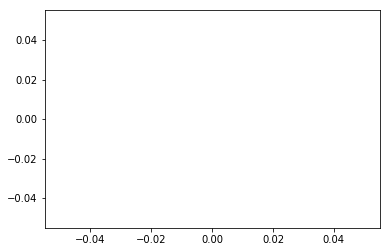

In [72]:
plt.plot(iteration_cost, 'r*')

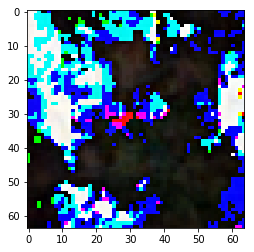

In [41]:
#visualize the value of W, it most look like cat
w_int = [int((i*5000) )for i in w_1[0,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

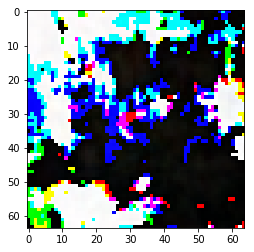

In [42]:
#visualize the value of W, it most look like cat
w_int = [int(i*1000) for i in w_1[1,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

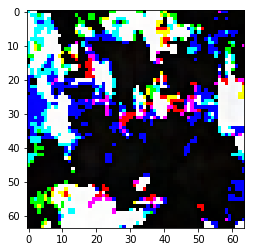

In [43]:
#visualize the value of W, it most look like cat
w_int = [int(i*1000) for i in w_1[2,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

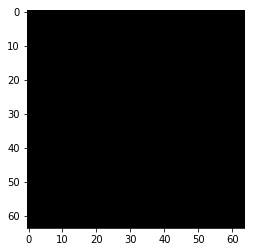

In [44]:
#visualize the value of W, it most look like cat
w_int = [int(i*6) for i in w_1[3,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

In [45]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

a = np.array([-1, -0.5, 0, 0.5, 1])
sigmoid(a)
tanh(a)

array([-0.76159416, -0.46211716,  0.        ,  0.46211716,  0.76159416])

In [46]:
#Train accuracy
correct_no_train = 0
total_no_train = 0
for i in range(209):
    #Forward propagation
    A_0 = np.array(X_train[:,i]).reshape(12288,1)

    Z_1 = np.dot(w_1.reshape(4,12288) , A_0) + b_1
    A_1 = tanh(Z_1)

    Z_2 = np.dot(w_2, A_1) +  b_2
    A_2 = tanh(Z_2)
    
    Z_3 = np.dot(w_3, A_2) + b_3
    A_3 = tanh(Z_3)
    
    Z_4 = np.dot(w_4, A_3) + b_4
    A_4 = sigmoid(Z_4)
    if (np.abs(A_4 - Y_train[:,i]) < 0.5):
        correct_no_train += 1
    
    total_no_train += 1

print(correct_no_train / total_no_train)

0.6555023923444976


In [47]:
#Test accuracy
correct_no_test = 0
total_no_test = 0
for i in range(50):
    #Forward propagation
    A_0 = np.array(X_test[:,i]).reshape(12288,1)

    Z_1 = np.dot(w_1.reshape(4,12288) , A_0) + b_1
    A_1 = tanh(Z_1)

    Z_2 = np.dot(w_2, A_1) +  b_2
    A_2 = tanh(Z_2)
    
    Z_3 = np.dot(w_3, A_2) + b_3
    A_3 = tanh(Z_3)
    
    Z_4 = np.dot(w_4,A_3) + b_4
    A_3 = sigmoid(Z_3)
    
    if (np.abs(A_4 - Y_test[:,i]) < 0.5):
        correct_no_test += 1
    
    total_no_test += 1

print(correct_no_test / total_no_test)

0.34


In [48]:
iteration_cost

[143.82159,
 140.72504,
 140.02542,
 139.05901,
 137.48781,
 136.43359,
 136.55908,
 136.05212,
 135.48599,
 135.12396,
 135.37471,
 135.08784,
 134.86974,
 134.74301,
 134.9552,
 134.77815,
 134.68451,
 134.64197,
 134.80249,
 134.67949,
 134.63091,
 134.62119,
 134.74904,
 134.64989,
 134.61226,
 134.6174,
 134.7363,
 134.63774,
 134.59752,
 134.61906,
 134.72684,
 134.63397,
 134.59525,
 134.62547,
 134.73183,
 134.63832,
 134.59883,
 134.63521,
 134.7382,
 134.64703,
 134.60692,
 134.65663,
 134.75003,
 134.65663,
 134.62178,
 134.67879,
 134.76761,
 134.66568,
 134.63884,
 134.69623,
 134.79709,
 134.69543,
 134.66685,
 134.74532,
 134.83479,
 134.70441,
 134.73981,
 134.85272,
 134.89404,
 134.74843,
 134.79636,
 134.7935,
 135.00734,
 134.93279,
 134.90633,
 134.86066,
 135.00212,
 135.08592,
 134.88658,
 135.11049,
 134.80154,
 134.82503,
 135.09935,
 134.96921,
 135.62483,
 135.11578,
 134.82899,
 135.16039,
 136.29239,
 135.32898,
 135.01115,
 135.34891,
 136.01436,
 135.0069

In [49]:
w_1[1,:]

array([-0.00333808, -0.00570523, -0.00383568, ..., -0.00213267,
        0.00017707, -0.00030146], dtype=float32)

In [50]:
w_1[2,:]

array([-0.00083888, -0.00241905, -0.00163108, ..., -0.00211029,
       -0.00162915, -0.00247368], dtype=float32)

In [51]:
w_1

array([[ -1.20871863e-03,  -2.11952464e-03,  -2.53940909e-03, ...,
         -7.88346006e-05,   3.66342050e-04,  -1.09468563e-03],
       [ -3.33808316e-03,  -5.70523366e-03,  -3.83568206e-03, ...,
         -2.13266606e-03,   1.77074442e-04,  -3.01462889e-04],
       [ -8.38876702e-04,  -2.41904799e-03,  -1.63107971e-03, ...,
         -2.11029383e-03,  -1.62914558e-03,  -2.47368403e-03],
       [  1.17946882e-02,   1.44206136e-02,   1.36029990e-02, ...,
          5.95065067e-03,   3.20913806e-03,   4.28867294e-03]], dtype=float32)

In [52]:
b_1

array([[ 0.00786281],
       [ 0.01052582],
       [ 0.0067308 ],
       [ 0.00441419]], dtype=float32)

In [53]:
np.matmul(w_1, x_data) + b_1

NameError: name 'x_data' is not defined

In [54]:
iteration_cost

[143.82159,
 140.72504,
 140.02542,
 139.05901,
 137.48781,
 136.43359,
 136.55908,
 136.05212,
 135.48599,
 135.12396,
 135.37471,
 135.08784,
 134.86974,
 134.74301,
 134.9552,
 134.77815,
 134.68451,
 134.64197,
 134.80249,
 134.67949,
 134.63091,
 134.62119,
 134.74904,
 134.64989,
 134.61226,
 134.6174,
 134.7363,
 134.63774,
 134.59752,
 134.61906,
 134.72684,
 134.63397,
 134.59525,
 134.62547,
 134.73183,
 134.63832,
 134.59883,
 134.63521,
 134.7382,
 134.64703,
 134.60692,
 134.65663,
 134.75003,
 134.65663,
 134.62178,
 134.67879,
 134.76761,
 134.66568,
 134.63884,
 134.69623,
 134.79709,
 134.69543,
 134.66685,
 134.74532,
 134.83479,
 134.70441,
 134.73981,
 134.85272,
 134.89404,
 134.74843,
 134.79636,
 134.7935,
 135.00734,
 134.93279,
 134.90633,
 134.86066,
 135.00212,
 135.08592,
 134.88658,
 135.11049,
 134.80154,
 134.82503,
 135.09935,
 134.96921,
 135.62483,
 135.11578,
 134.82899,
 135.16039,
 136.29239,
 135.32898,
 135.01115,
 135.34891,
 136.01436,
 135.0069

In [55]:
iteration_cost[1500]

IndexError: list index out of range

In [56]:
#Forward propagation
A_0 = X_train

Z_1 = np.dot(w_1 , A_0) + b_1
A_1 = tanh(Z_1)

Z_2 = np.dot(w_2, A_1) +  b_2
A_2 = tanh(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = tanh(Z_3)

Z_4 = np.dot(w_4, A_3) + b_4
A_4 = sigmoid(Z_4)


In [57]:
A_4

array([[ 0.35948552,  0.35947418,  0.35948564,  0.35948232,  0.35946218,
         0.35948275,  0.3593941 ,  0.35948602,  0.35948564,  0.35948473,
         0.3594856 ,  0.35948564,  0.35948564,  0.35948564,  0.35948564,
         0.35948555,  0.35947566,  0.35948559,  0.35948564,  0.35948555,
         0.35948564,  0.35948141,  0.35948564,  0.35948474,  0.35948564,
         0.35948472,  0.35948551,  0.35948564,  0.35948549,  0.35948499,
         0.35948599,  0.35948564,  0.35933439,  0.35948559,  0.35948563,
         0.35940515,  0.35948563,  0.35948564,  0.35936187,  0.35948564,
         0.35780241,  0.35948392,  0.35948435,  0.35948564,  0.35948564,
         0.35948436,  0.35948558,  0.35948552,  0.35948564,  0.35948564,
         0.35948564,  0.35948563,  0.35948564,  0.35948564,  0.35948565,
         0.35918575,  0.35948564,  0.35948564,  0.35946662,  0.35948563,
         0.35945954,  0.3594856 ,  0.35948562,  0.35948547,  0.35948564,
         0.35948533,  0.35947594,  0.35948564,  0.3

In [473]:
np.log(.5) * 2 * 209

-289.73552147405712